In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn import svm

data=pd.read_csv("train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data.shape

(614, 13)

In [3]:
data.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [5]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [6]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [7]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [8]:

data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [9]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [11]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median(),inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [15]:

data['Combined_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [16]:
data['Income_Loan_Ratio']=(data['Loan_Amount_Term']*data['Combined_Income'])/data['LoanAmount']
mean=np.mean(data['Income_Loan_Ratio'])
std=np.std(data['Income_Loan_Ratio'])
mean=float(mean)
std=float(std)
data['Income_Loan_Ratio']=(data['Income_Loan_Ratio']-mean)/std
data=data[data['Income_Loan_Ratio']<=2]


In [17]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Combined_Income,Income_Loan_Ratio
0,LP001002,Male,No,0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0,-0.061855
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,-0.010825
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,-0.068354
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,-0.183862
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,-0.146664
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,Y,9613.0,-0.323439
6,LP001013,Male,Yes,0,Not Graduate,No,95.0,360.0,1.0,Urban,Y,3849.0,-0.201655
7,LP001014,Male,Yes,3+,Graduate,No,158.0,360.0,0.0,Semiurban,N,5540.0,-0.348823
8,LP001018,Male,Yes,2,Graduate,No,168.0,360.0,1.0,Urban,Y,5532.0,-0.406441
9,LP001020,Male,Yes,1,Graduate,No,349.0,360.0,1.0,Semiurban,N,23809.0,0.546123


In [18]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2,random_state=4)

In [19]:
train.shape

(476, 13)

In [20]:
train['Loan_Status'].value_counts()

Y    325
N    151
Name: Loan_Status, dtype: int64

In [21]:
test.shape


(119, 13)

Text(0,0.5,'Loan_Status')

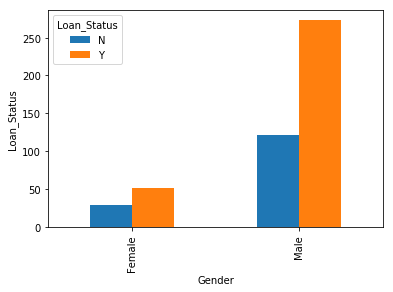

In [22]:
pd.crosstab(train.Gender,train.Loan_Status).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

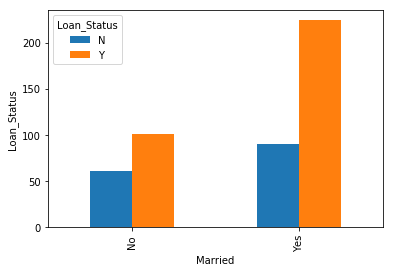

In [23]:
pd.crosstab(train.Married,train.Loan_Status).plot(kind='bar')
plt.xlabel('Married')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

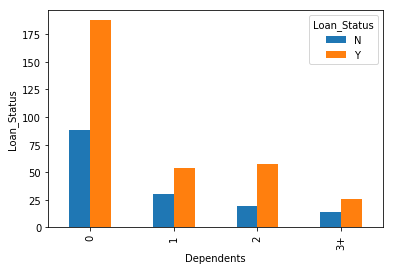

In [24]:
pd.crosstab(train.Dependents,train.Loan_Status).plot(kind='bar')
plt.xlabel('Dependents')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

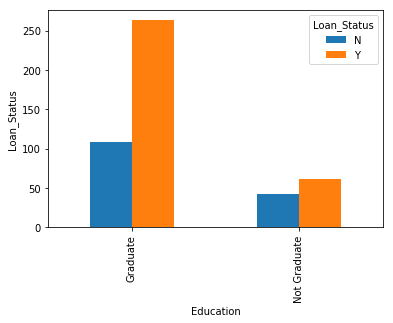

In [25]:
pd.crosstab(train.Education,train.Loan_Status).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Loan_Status')

Text(0,0.5,'Loan_Status')

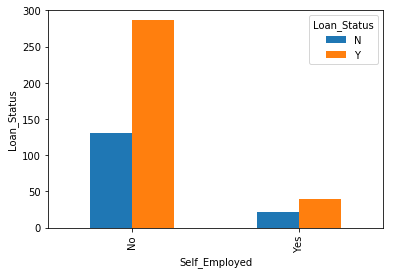

In [26]:
pd.crosstab(train.Self_Employed,train.Loan_Status).plot(kind='bar')
plt.xlabel('Self_Employed')
plt.ylabel('Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000137F1032630>,
      dtype=object)

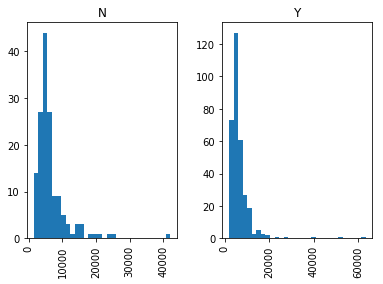

In [27]:
train.hist(column="Combined_Income",by="Loan_Status",bins=30)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000137F11200F0>,
      dtype=object)

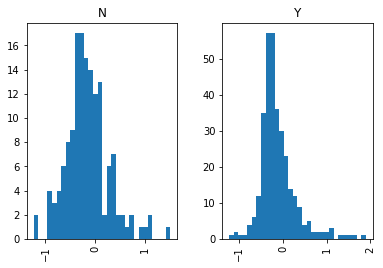

In [28]:
train.hist(column="Income_Loan_Ratio",by="Loan_Status",bins=30)

In [29]:
cols = list(train.columns.values)
cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Combined_Income',
 'Income_Loan_Ratio']

In [30]:
train = train[['Loan_ID', 'Gender', 'Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Income_Loan_Ratio','Loan_Status']]
test = test[['Loan_ID', 'Gender', 'Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Income_Loan_Ratio','Loan_Status']]


In [31]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Income_Loan_Ratio,Loan_Status
161,LP001562,Male,Yes,0,Graduate,No,275.0,360.0,1.0,Urban,7933.0,-0.516599,N
14,LP001030,Male,Yes,2,Graduate,No,17.0,120.0,1.0,Urban,2385.0,-0.032991,Y
216,LP001722,Male,Yes,0,Graduate,No,135.0,360.0,1.0,Rural,1950.0,-0.905344,N
201,LP001677,Male,No,2,Graduate,No,166.0,360.0,0.0,Semiurban,4923.0,-0.494754,Y
532,LP002723,Male,No,2,Graduate,No,110.0,360.0,0.0,Rural,3588.0,-0.414819,N


In [32]:
train_copy=train.copy()
train_copy['Gender'] = train_copy['Gender'].map({'Male':1,'Female':0})
train_copy['Married'] = train_copy['Married'].map({'Yes':1,'No':0})
train_copy['Dependents'] = train_copy['Dependents'].map({'3+':3,'0':0, '1':1, '2':2})
train_copy['Education'] = train_copy['Education'].map({'Graduate':1,'Not Graduate':0})
train_copy['Self_Employed'] = train_copy['Self_Employed'].map({'Yes':1,'No':0})
train_copy['Property_Area'] = train_copy['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
train_copy['Loan_Status'] = train_copy['Loan_Status'].map({'Y':1,'N':0})
train_copy.head()




,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Income_Loan_Ratio,Loan_Status
161,LP001562,1,1,0,1,0,275.0,360.0,1.0,2,7933.0,-0.516599,0
14,LP001030,1,1,2,1,0,17.0,120.0,1.0,2,2385.0,-0.032991,1
216,LP001722,1,1,0,1,0,135.0,360.0,1.0,0,1950.0,-0.905344,0
201,LP001677,1,0,2,1,0,166.0,360.0,0.0,1,4923.0,-0.494754,1
532,LP002723,1,0,2,1,0,110.0,360.0,0.0,0,3588.0,-0.414819,0


In [33]:

test_copy=test.copy()
test_copy['Gender'] = test_copy['Gender'].map({'Male':1,'Female':0})
test_copy['Married'] = test_copy['Married'].map({'Yes':1,'No':0})
test_copy['Dependents'] = test_copy['Dependents'].map({'3+':3,'0':0, '1':1, '2':2})
test_copy['Education'] = test_copy['Education'].map({'Graduate':1,'Not Graduate':0})
test_copy['Self_Employed'] = test_copy['Self_Employed'].map({'Yes':1,'No':0})
test_copy['Property_Area'] = test_copy['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
test_copy['Loan_Status'] = test_copy['Loan_Status'].map({'Y':1,'N':0})
test_copy.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Combined_Income,Income_Loan_Ratio,Loan_Status
233,LP001776,0,0,0,1,0,280.0,360.0,1.0,1,8333.0,-0.491944,1
159,LP001552,1,1,0,1,0,255.0,360.0,1.0,1,10208.0,-0.214730,1
559,LP002804,0,1,0,1,0,182.0,360.0,1.0,1,6486.0,-0.333328,1
557,LP002795,1,1,3,1,1,260.0,360.0,1.0,1,10139.0,-0.242671,1
165,LP001574,1,1,0,1,0,182.0,360.0,1.0,0,6873.0,-0.275935,1


In [34]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_copy.iloc[:,1:12],train_copy.iloc[:,-1])


In [35]:
labels=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Income_Loan_Ratio'];
for feature in zip(labels,clf.feature_importances_):
    print(feature)

('Gender', 0.010738665308201733)
('Married', 0.004849719816607234)
('Dependents', 0.03288559564056252)
('Education', 0.01907556461198845)
('Self_Employed', 0.015138586935224739)
('LoanAmount', 0.15825332996005442)
('Loan_Amount_Term', 0.017646550757809184)
('Credit_History', 0.2975073339540112)
('Property_Area', 0.035992528442859564)
('Combined_Income', 0.21773790360542972)
('Income_Loan_Ratio', 0.19017422096725123)


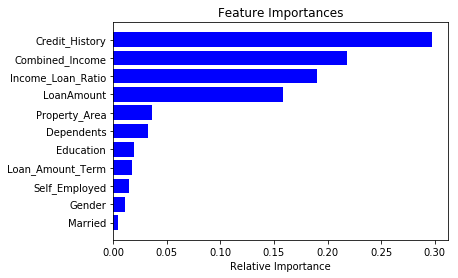

In [36]:
features = labels
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [37]:
important_train=train_copy[['Credit_History','Income_Loan_Ratio','Dependents','Property_Area']]
important_test=test_copy[['Credit_History','Income_Loan_Ratio','Dependents','Property_Area']]
new_clf = DecisionTreeClassifier()
new_clf.fit(important_train, train_copy.iloc[:,-1])
y_pred = new_clf.predict(important_test)
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score


0.6722689075630253

In [38]:
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[15, 20],
       [19, 65]], dtype=int64)

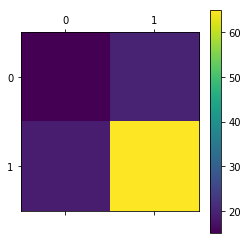

In [39]:
plt.matshow(results)
plt.colorbar()

In [40]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)


0.7647058823529411


In [41]:
y_true=test_copy.iloc[:,-1]

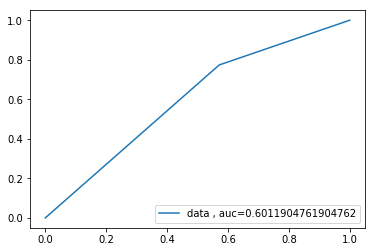

In [42]:
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [43]:


clf = RandomForestClassifier(n_estimators=300, random_state=5, min_samples_split=4, class_weight={0:0.6, 1:0.4})
clf = clf.fit(train_copy.iloc[:,1:12], train_copy.iloc[:,-1])



In [44]:
labels=['Gender','Married','Dependents','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Combined_Income','Income_Loan_Ratio'];
for feature in zip(labels,clf.feature_importances_):
    print(feature)

('Gender', 0.018216286090041597)
('Married', 0.02257802047429016)
('Dependents', 0.043094427622692846)
('Education', 0.02094416227714751)
('Self_Employed', 0.016662967522401737)
('LoanAmount', 0.1568069116901849)
('Loan_Amount_Term', 0.0321121599001729)
('Credit_History', 0.2796735796448185)
('Property_Area', 0.04089893667593411)
('Combined_Income', 0.1849518337447296)
('Income_Loan_Ratio', 0.18406071435758653)


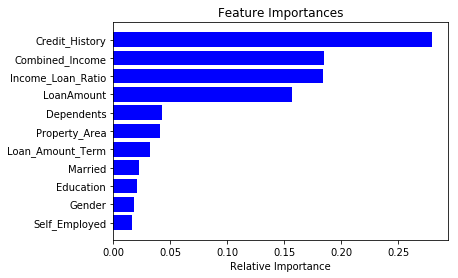

In [45]:
features = labels
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [46]:
important_train = train_copy[['Credit_History','Income_Loan_Ratio','Dependents','Property_Area']]
important_test = test_copy[['Credit_History','Income_Loan_Ratio','Dependents','Property_Area']]


In [47]:
new_clf = RandomForestClassifier(n_estimators=300, random_state=5, min_samples_split=4, class_weight={0:0.6, 1:0.4})
new_clf.fit(important_train, train_copy.iloc[:,-1])
y_pred = new_clf.predict(important_test)
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.7563025210084033

In [48]:
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[19, 16],
       [13, 71]], dtype=int64)

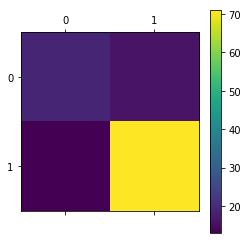

In [49]:
plt.matshow(results)
plt.colorbar()

In [50]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)


0.8160919540229885


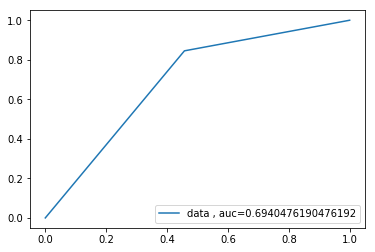

In [51]:
y_true = test_copy.iloc[:,-1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
clf = svm.SVC(kernel='linear')
clf.fit(train_copy.iloc[:,1:12],train_copy.iloc[:,-1])
y_pred = clf.predict(test_copy.iloc[:,1:12])


In [53]:
score=metrics.accuracy_score(test_copy.iloc[:,-1], y_pred)
score

0.7983193277310925

In [54]:
results=metrics.confusion_matrix(test_copy.iloc[:,-1],y_pred)
results

array([[12, 23],
       [ 1, 83]], dtype=int64)

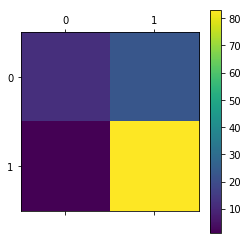

In [55]:
plt.matshow(results)
plt.colorbar()

In [56]:
report=metrics.precision_score(test_copy.iloc[:,-1],y_pred)
print(report)


0.7830188679245284


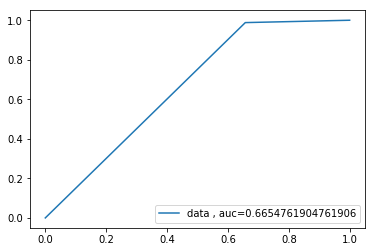

In [57]:
y_true = test_copy.iloc[:,-1]
fpr, tpr, threshold = metrics.roc_curve(y_true, y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr,tpr,label="data , auc="+str(auc))
plt.legend(loc=4)
plt.show()